In [1]:
import math
import random
import matplotlib.pyplot as plt
import copy
import numpy
import numpy as np
import time
import threading
%matplotlib inline

# Data preparation
please notice that the eil101.txt must in the same path as the .ipynb file 

In [2]:
# read the tsp data
def Read():
    with open(r'eil101.txt', 'r') as f:
            data = f.read()
            data = data.split()
            length = len(data)
            x = []
            y = []
#             city = []
            length = length
            for i in range(length // 3):
                x.append(int(data[3 * i + 1]))
                y.append(int(data[3 * i + 2]))
#                 city.append(int(data[3*i]))
            return x,y

## initialize tour map
this class includ basic functions

In [41]:
class Map:
    def __init__(self):
        self.path = [[], []]


    def add(self, x, y):
        self.path[0].append(x)
        self.path[1].append(y)

    def size(self): #number of city
        return len(self.path[0])

    def NBHDdistance(self, i, j): #calculate Euclid distance between two cities i,j
        a = self.path[0][i] - self.path[0][j]
        b = self.path[1][i] - self.path[1][j]
        return math.sqrt(a ** 2 + b ** 2) 

    def distance(self):
        distance = 0
        for i in range(self.size() - 1):
            distance += self.NBHDdistance(i, i + 1) # distance of travel to all cities
        distance += self.NBHDdistance(0, self.size() - 1) # total distance includs the back to first city
        return distance #calculate all distance 

    def exchange(self, a, b):
        self.path[0][a], self.path[0][b] = self.path[0][b], self.path[0][a]
        self.path[1][a], self.path[1][b] = self.path[1][b], self.path[1][a] #exchange cities to generate new solution

# implement algorithms

## DSA-CE&MAP algorithm
this class is implement the main method of this experiment

In [42]:
class SA:
    def __init__(self, map, T, cool):
        self.path = map
        l = []
        self.min = self.path
        for i in range(self.path.size()):
            l.append(i)
        for i in range(1):
            temp = Map()
            l = numpy.random.permutation(l)# generate random solution 
            for num in l:
                temp.add(self.path.path[0][num], self.path.path[1][num])# generate random solution 
            if self.min.distance() > temp.distance(): # judge if new solution better than old one
                self.min = temp  # if new solution better,update
        self.path = self.min 
        self.T = T  # begin temperature
        self.cool = cool
        self.times = 0
        self.sameTimes = 0
        self.distance = self.path.distance()
        self.best = self.path.distance()
        if self.path.size() < 30: 
            coolingEnhancer = 0.5
        elif self.path.size() < 150:
            coolingEnhancer = 0.05
        elif self.path.size() < 750:
            coolingEnhancer = 0.005
        else:
            coolingEnhancer = 0.0005
        self.coolingEnhancer = coolingEnhancer

        plt.clf()   #plot initial solution
        plt.plot(self.path.path[0], self.path.path[1])
        plt.scatter(self.path.path[0],
                    self.path.path[1])
        plt.show()
        self.Tl = []
        self.timsl = []
        self.dl = []

    def run(self):
        print("BEGIN Distance: ", self.path.distance()) 
        while self.T >= 1: # run until T<1 
            self.timsl.append(self.times)
            self.Tl.append(self.T)
            self.dl.append(self.path.distance())
            self.judge() #产生新解，判断是否接受新解并更新，更新温度和时间，每迭代10000次输出一次

            if self.path.distance() == self.distance: #如果新解dis=旧解dis
                self.sameTimes += 1
                '''
                if self.sameTimes == 2000:
                    self.T *= 200
                    self.sameTimes = 0
                '''
            else:
                self.sameTimes = 0
                self.distance = self.path.distance()

        plt.clf() #plot final solution
        plt.plot(self.path.path[0], self.path.path[1])
        plt.scatter(self.path.path[0], self.path.path[1])
        plt.show()
        plt.clf()
        plt.rcParams['figure.figsize'] = (10, 6)
        plt.plot(self.timsl, self.Tl) # plot temperature changes
        #plt.scatter(self.timsl, self.Tl)
        plt.show()
        plt.clf()
        plt.rcParams['figure.figsize'] = (10, 6)
        plt.plot(self.timsl, self.dl) #plot distance in each temperature
        #plt.scatter(self.timsl, self.dl)
        plt.show()

        print("END Distance:", self.path.distance())
        print("Times:", self.times)
        print("Excess:", '%.2f%%' % ((self.path.distance() - 629) / 629 * 100)) 

#     def move(self):
#         a = 0
#         b = 0
#         while a == b:
#             a = random.randint(1, self.path.size() - 1)
#             b = random.randint(1, self.path.size() - 1)
#         return a, b  # select 2 different cities

    def neighbor(self):
            a = b = 0
            while a == b:
                a = random.randint(1, self.path.size() - 1)
                b = random.randint(1, self.path.size() - 1) # select 2 different cities
            t = copy.deepcopy(self.path)
            t.exchange(a, b) # generate a initial new solution
            temp = t
            d = temp.distance()# initial new distance

    #         for i in range(10):
    #             a = b = 0
    #             while a == b:
    #                 a = random.randint(1, self.path.size() - 1)
    #                 b = random.randint(1, self.path.size() - 1)
    #             t = copy.deepcopy(self.path)
    #             t.exchange(a, b)
    #             if t.distance() < d:
    #                 temp = t
    #                 d = t.distance() #交换两个城市，比较

    #         for i in range(10):
    #             a = b = c = 0
    #             while a == b or b == c or a == c:
    #                 a = random.randint(1, self.path.size() - 1)
    #                 b = random.randint(1, self.path.size() - 1)
    #                 c = random.randint(1, self.path.size() - 1)
    #             t = copy.deepcopy(self.path)
    #             t.exchange(a, b)
    #             t.exchange(b, c)
    #             if t.distance() < d:
    #                 temp = t
    #                 d = t.distance() #交换三个城市，比较


            for i in range(10):
                a = b = 0
                while a == b:
                    a = random.randint(1, self.path.size() - 1)
                    b = random.randint(1, self.path.size() - 1)
                a, b = min(a, b), max(a, b)
                tempx = self.path.path[0][a:b]
                tempy = self.path.path[1][a:b]
                tempx.reverse()
                tempy.reverse()
                tempx = self.path.path[0][:a] + tempx + self.path.path[0][b:]
                tempy = self.path.path[1][:a] + tempy + self.path.path[1][b:] #选取a，b之间的城市，逆转
                t = Map()
                t.path[0] = tempx
                t.path[1] = tempy
                if t.distance() < d:
                    temp = t
                    d = t.distance()
            return temp

        
    def judge(self): #产生新解，判断是否接受新解并更新，更新温度和时间，每迭代10000次输出一次
        # distance0 = self.path.distance()
        # a, b = self.move()
        # self.path.exchange(a, b)
        # distance1 = self.path.distance()

        temp = self.neighbor() # generate new solution
        if self.isSelected(self.probability(self.path.distance(), temp.distance())):
            self.path = temp #if Ture,choose new solution
        if self.best > temp.distance():
            self.best = temp.distance() #if new dis<old best,update best

        # if not self.isSelected(self.probability(distance0, distance1)):
        #     self.path.exchange(a, b)

        dT = self.T * self.coolingEnhancer * self.cool #calculate annealing temperature
        self.T -= dT #update new temperature
        
#         plt.clf()
#         plt.plot(self.path.path[0], self.path.path[1])
#         plt.scatter(self.path.path[0], self.path.path[1])
        
        self.times += 1 #update times

        if self.times % 10000 == 0: #每迭代10000次输出一次
            print(self.T, self.times, self.path.distance())
            plt.clf()
            plt.plot(self.path.path[0], self.path.path[1])
            plt.scatter(self.path.path[0],
                        self.path.path[1])
            plt.show()

        '''
        if self.times % 10000 == 0:
            plt.clf()
            plt.plot(self.path.path[0], self.path.path[1])
            plt.scatter(self.path.path[0] + self.path.path[0][self.path.size() - 1: self.path.size()],
                        self.path.path[1] + self.path.path[1][self.path.size() - 1: self.path.size()])
            plt.show()
        '''
        
    
    
    def probability(self, distance0, distance1):
        E = distance1 - distance0
        if E <= 0:
            return 1 # if dis1<dis2, choose solution1

        else:
            E2 = self.best - distance1
            e1 = (- E) / self.T
            e2 = (-E2) / self.T
            return math.exp(e1-e2)   # if dis1>dis2, choose solution1 with this probability 

    def isSelected(self, p):
        # print(p)
        R = random.random()
        if R < p:
            return True
        else:
            return False #if random number<p,choose new solution 

## Hillclimb algorithm
this class implement one of the comparison  methods, three different Perturbation operator are defined as function neighbor，neighbor2，neighbor3.

In [43]:
class HC:
    def __init__(self, map, state):
        self.path = map
        l = []
        self.min = self.path
        for i in range(self.path.size()):
            l.append(i)
        for i in range(10):
            temp = Map()
            l = numpy.random.permutation(l)
            for num in l:
                temp.add(self.path.path[0][num], self.path.path[1][num])
            if self.min.distance() > temp.distance():
                self.min = temp
        self.path = self.min
        self.times = 0
        self.state = state


    def run(self):
        while True: #新解等于旧解，跳出循环
            self.times += 1
            if self.state == 0:
                flag = self.select(self.neighbor()) #判断新解中是否有好于旧解的
            elif self.state == 1:
                flag = self.select(self.neighbor2())
            else:
                flag = self.select(self.neighbor3())
            if not flag:    #new solution = old solution,break
                plt.plot(self.path.path[0], self.path.path[1])
                plt.scatter(self.path.path[0], self.path.path[1])
                plt.show()
#                 print(self.path.distance())
                print("END Distance:", self.path.distance())
                print("Times:", self.times)
                print("Excess:", '%.2f%%' % ((self.path.distance() - 629) / 629 * 100)) 

                break

    def neighbor(self):
        nb = []
        nb.append(self.path)
        for i in range(10 * self.path.size()): #generate 10*city number neigbour 
            a = b = 0
            while a == b:
                a = random.randint(1, self.path.size() - 1)
                b = random.randint(1, self.path.size() - 1)
            temp = copy.deepcopy(self.path)
            temp.exchange(a, b) #exchange two cities to generate new solution
            nb.append(temp)
        return nb   

    def neighbor2(self):
        nb = []
        nb.append(self.path)
        for i in range(10 * self.path.size()):
            a = b = c = 0
            while a == b or b == c or a == c:
                a = random.randint(1, self.path.size() - 1)
                b = random.randint(1, self.path.size() - 1)
                c = random.randint(1, self.path.size() - 1)
            temp = copy.deepcopy(self.path)
            temp.exchange(a, b)
            temp.exchange(b, c)
            nb.append(temp)
        return nb

    def neighbor3(self):
        nb = []
        nb.append(self.path)
        for i in range(10 * self.path.size()):
            a = b = 0
            while a == b:
                a = random.randint(1, self.path.size() - 1)
                b = random.randint(1, self.path.size() - 1)
            a, b = min(a, b), max(a, b)
            tempx = self.path.path[0][a:b]
            tempy = self.path.path[1][a:b]
            tempx.reverse()
            tempy.reverse()
            tempx = self.path.path[0][:a] + tempx + self.path.path[0][b:]
            tempy = self.path.path[1][:a] + tempy + self.path.path[1][b:]
            temp = Map()
            temp.path[0] = tempx
            temp.path[1] = tempy
            nb.append(temp)
        return nb

    def select(self, nb):
        temp = nb[0] # old solution
        change = False
        for path in nb:
            if path.distance() < temp.distance():
                change = True 
                temp = path # find the best solution in all new solution
        self.path = temp #update the best solution to path
        return change

## Random Search algorithm
this class is another comparison algorithm

In [44]:
class RS:
    def __init__(self, map,num):
        self.path = map
        self.num = num
        l = []
        self.min = self.path
        for i in range(self.path.size()):
            l.append(i)
        for i in range(100):
            temp = Map()
            l = numpy.random.permutation(l)
            for num in l:
                temp.add(self.path.path[0][num], self.path.path[1][num])
            if self.min.distance() > temp.distance():
                self.min = temp
        self.path = self.min
        self.distance = self.path.distance()
        self.best = self.path.distance()
        
    def run(self):
        R = self.neighbor()
        temp = R[0] # old solution
        for path in R:
            if path.distance() < temp.distance():
                temp = path # find the best solution in all new solution
        self.path = temp 
        
        plt.plot(self.path.path[0], self.path.path[1])
        plt.scatter(self.path.path[0], self.path.path[1])
        plt.show()
        
        print("END Distance:", self.path.distance())
#         print("Times:", self.times)
        print("Excess:", '%.2f%%' % ((self.path.distance() - 629) / 629 * 100))
       


                
    def neighbor(self):
        nb = []
        nb.append(self.path)
        for i in range(self.num): #generate num neigbours 
            a = b = 0
            while a == b:
                a = random.randint(1, self.path.size() - 1)
                b = random.randint(1, self.path.size() - 1)
            temp = copy.deepcopy(self.path)
            temp.exchange(a, b) #exchange two cities to generate new solution
            nb.append(temp)
        return nb  
    
    
#     def select(self, nb):
#         temp = nb[0] # old solution
#         change = False
#         for path in nb:
#             if path.distance() < temp.distance():
#                 change = True 
#                 temp = path # find the best solution in all new solution
#         self.path = temp #update the best solution to path
#         return change

# Run and tune part
this section is for run different algorithms which implemented before, output results plot tour path and repeat experiment many times. Moreover, can easily tune parameters for each algorithm.



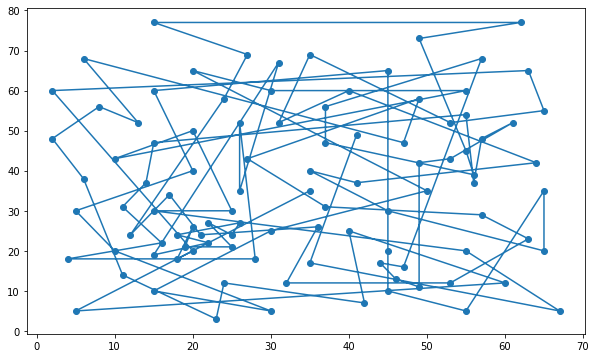

END Distance: 1987.104354490648
Excess: 215.91%
Totally cost 2.851511001586914 s


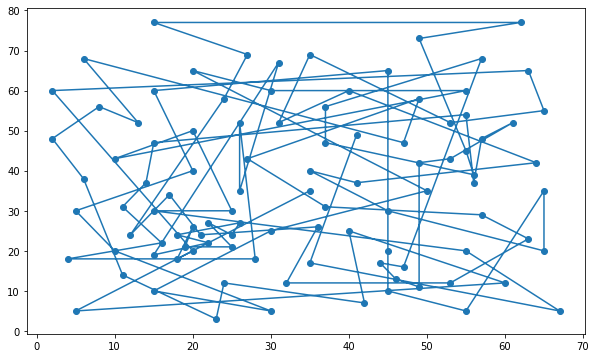

END Distance: 1987.104354490648
Excess: 215.91%
Totally cost 2.7593438625335693 s


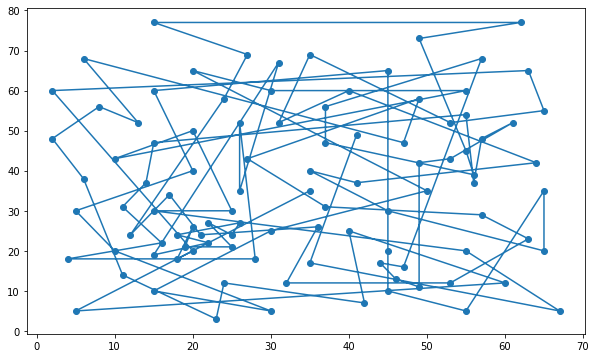

END Distance: 1987.104354490648
Excess: 215.91%
Totally cost 2.702169179916382 s


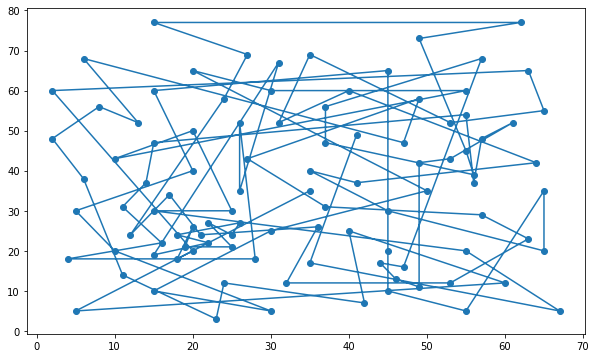

END Distance: 1987.104354490648
Excess: 215.91%
Totally cost 2.7986769676208496 s


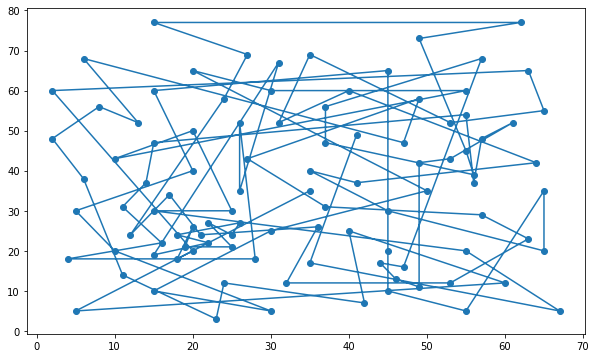

END Distance: 1987.104354490648
Excess: 215.91%
Totally cost 2.677366018295288 s


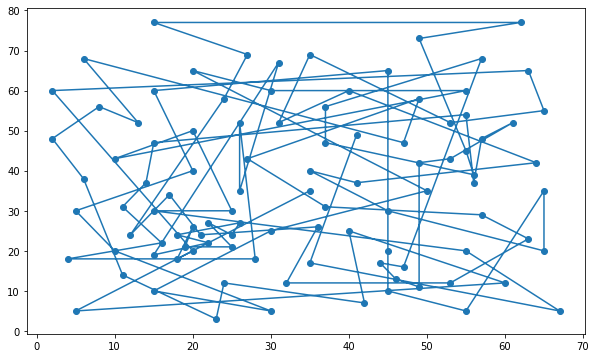

END Distance: 1987.104354490648
Excess: 215.91%
Totally cost 2.7360336780548096 s


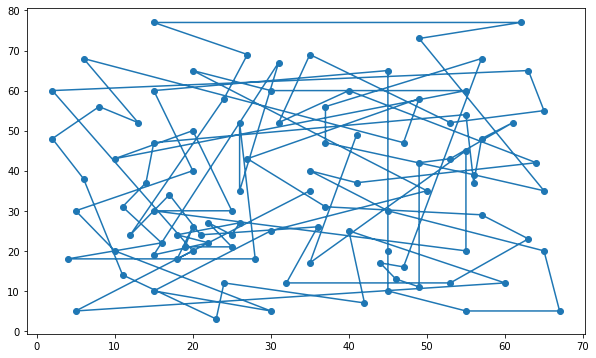

END Distance: 1989.9997466151092
Excess: 216.38%
Totally cost 2.806504964828491 s


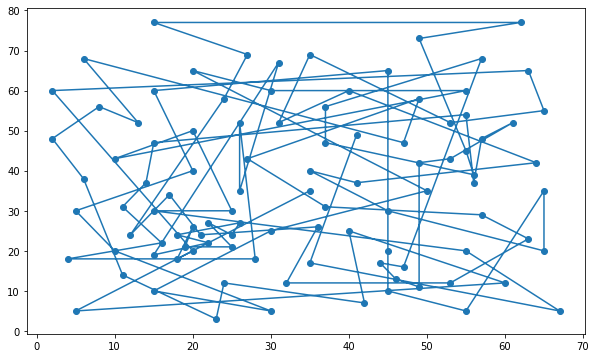

END Distance: 1987.104354490648
Excess: 215.91%
Totally cost 2.669635772705078 s


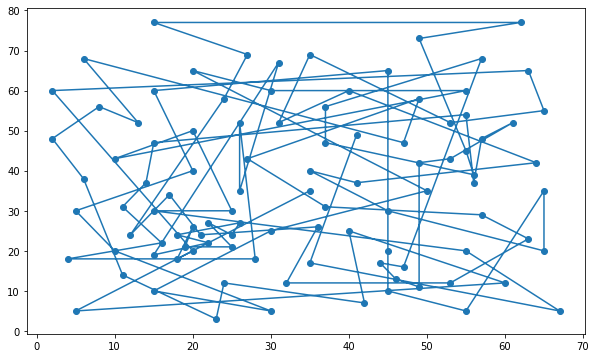

END Distance: 1987.104354490648
Excess: 215.91%
Totally cost 2.760324239730835 s


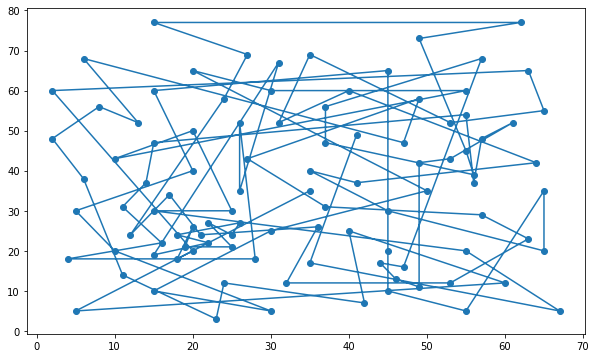

END Distance: 1987.104354490648
Excess: 215.91%
Totally cost 2.793231248855591 s
average dis: 1987.3938937030944
best: 1987.104354490648 worst: 1989.9997466151092
average excess: 215.96%
average cost: 2.7554796934127808


In [63]:
#Main 
list = []
exc=[]
all_t=[]
def algrun():
    global t, list ,exc,all_t
    time_start = time.time()

    map = Map()

    x, y = Read()
    map.path[0] = x
    map.path[1] = y
    
    # tune "state" to select different algorithm
    # state == 0: SA,  state == 1: HC,  state == 2: RS
    state = 2

    if state == 0:
        # SA(map, T, Coolrate)
        alg = SA(map, 100, 0.001)
        alg.run()
    elif state == 1:
        # tune "state" to select different perturbation operator
        # HC(map, state), state = 0: neighbor1, state = 1: neighbor2, state = 2: neighbor3
        alg = HC(map, 2)
        alg.run()
    else:
        alg = RS(map,10000)
        alg.run()
    list.append(alg.path.distance())
    exc.append(((alg.path.distance() - 629) / 629 * 100))
    time_end = time.time()
#     t += (time_end - time_start)
    t = time_end - time_start
    print('Totally cost', time_end - time_start, 's')
    all_t.append(t)
    
    
#Run multiple experiments
n = 10
for i in range(n):
    algrun()
list.sort()

sum = 0
for dis in list:
    sum += dis
if n != 1:
    print('=======================================')
    print('average dis:',sum / n)
    print('best:',list[0],'worst:',list[-1])
    print('average excess:','%.2f%%' % np.mean(exc))
    print('average cost:',np.mean(all_t))

In [65]:
print(all_t)

[2.851511001586914, 2.7593438625335693, 2.702169179916382, 2.7986769676208496, 2.677366018295288, 2.7360336780548096, 2.806504964828491, 2.669635772705078, 2.760324239730835, 2.793231248855591]


# expriment result record
these are test records used and analyzed in the experiment report. 

In [67]:
Neighbor1=[979.4626111545649, 981.2324171790873, 994.6331731925219, 1016.6550008545287, 1027.6162723234722, 1033.2660359714073, 1038.551037490366, 1040.1284839111865, 1079.273486823034, 1088.130061556505]
Neighbor2=[1230.6456922874152, 1293.6334574724126, 1300.4521166097175, 1302.9524536809984, 1309.5523892243518, 1309.5760019509567, 1323.895653524104, 1324.5879368872495, 1418.9185647499733, 1422.274498828431]
Neighbor3=[713.3050661420472, 715.9840309647178, 726.284460847837, 726.6932139978361, 733.6021941071043, 737.1356681377376, 749.65125559273, 751.5260857887065, 754.745250455432, 764.3856575971362]
neigbor3_t=[14.249872922897339, 14.295175790786743, 14.337398052215576, 15.253289937973022, 15.155401945114136, 14.880838871002197, 14.132533073425293, 14.813712120056152, 15.80096697807312, 15.413809776306152]
neigbor3_ex=[13.409168254058458, 14.195963136040845, 14.950671902539762, 15.70051038109479, 15.82134221102315, 15.939160464877613, 16.688649219004752, 16.7695567817577, 17.095367278990228, 21.5216252]

In [120]:
n_100=[2008.8440019116097, 2018.8232982391216, 2020.2625829561443, 2022.4887226859462, 2022.8440928872908, 2022.8440928872908, 2030.77101670937, 2035.0917882478955, 2040.1063554008917, 2042.9281542864674]
n_1000=[1987.104354490648, 1987.104354490648, 1987.104354490648, 1995.6879727083292, 2002.5791370296479, 2002.5791370296479, 2007.9086317685321, 2022.8440928872908, 2023.6177503198237, 2027.5378805347339]
n_10000=[1987.104354490648, 1987.104354490648, 1987.104354490648, 1987.104354490648, 1987.104354490648, 1987.104354490648, 1987.104354490648, 1987.104354490648, 1987.104354490648, 1995.6879727083292]
n_100000=[1987.104354490648, 1987.104354490648, 1987.104354490648, 1987.104354490648, 1987.104354490648, 1987.104354490648, 1987.104354490648, 1987.104354490648, 1987.104354490648, 1987.104354490648]
N10000_t=[2.851511001586914, 2.7593438625335693, 2.702169179916382, 2.7986769676208496, 2.677366018295288, 2.7360336780548096, 2.806504964828491, 2.669635772705078, 2.760324239730835, 2.793231248855591]
N10000_ex=[215.91484173142254, 215.91484173142254, 215.91484173142254, 215.91484173142254, 215.91484173142254, 215.614484173142254, 216.37515844437348, 216.841742254, 215.91484173142254, 217.28]

In [121]:
SA_result=[645.85, 658.9242495255683, 660.3135822957568, 664.1958117088129, 664.5563426833576, 665.1505925765163, 667.1298781054137, 667.8672861040098, 670.6095993776365, 677.7224086251637]
SA_t=[155.3204309940338, 155.39629197120667, 155.50656986236572, 155.60141515731812, 155.9645380973816, 156.22565984725952, 158.8348150253296, 159.85622215270996, 160.26057410240173, 163.79776215553284]
SA_ex=[2.68, 4.757432357006082, 4.978311970708547, 5.595518554660242, 5.652836674619645, 5.747312015344398, 6.061983800542718, 6.179218776472154, 6.615198629194996, 7.7404198509564974]

## Plot results
this part is used to plot comparision charts

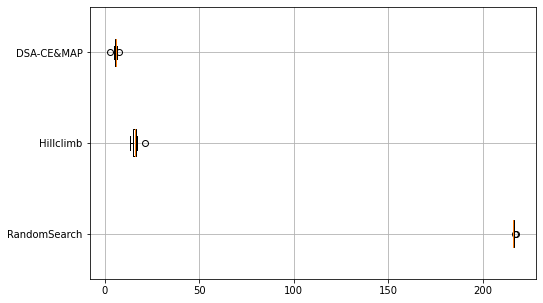

In [132]:
plt.figure(figsize=(8,5))
plt.grid()
labels = 'RandomSearch','Hillclimb','DSA-CE&MAP'
plt.boxplot([N10000_ex, neigbor3_ex, SA_ex], labels = labels,vert=False)
plt.show()


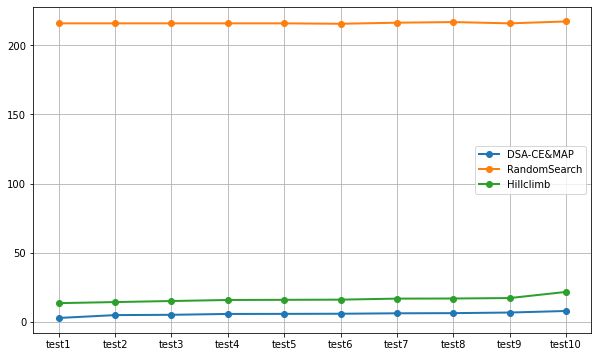

In [133]:
plt.grid() 
plt.plot(SA_ex, linewidth=2, label='DSA-CE&MAP', marker='o')  
plt.plot(N10000_ex, linewidth=2, label='RandomSearch', marker='o') 
plt.plot(neigbor3_ex, linewidth=2, label='Hillclimb', marker='o')  

x=[0,1,2,3,4,5,6,7,8,9]
plt.xticks(x, ('test1', 'test2', 'test3', 'test4', 'test5', 'test6', 'test7', 'test8', 'test9', 'test10'))

plt.legend() 

plt.show()
